## Table of Contents
- [National Housing Cost Index](#National-Housing-Cost-Index)
- [Planning Permissions Granted](#Planning-Permissions-Granted)
- [Construction Sector by Type of Building and Construction](#Construction-Sector-by-Type-of-Building-and-Construction)
- [New Dwelling Completion](#New-Dwelling-Completion)
- [ESB Connections](#ESB-Connections)
- [Average Earnings](#EHQ03---Average-Earnings,-Hours-Worked,-Employment-and-Labour-Costs)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import requests
from io import StringIO

import time
from datetime import datetime

import panel as pn
pn.extension('plotly')
# import geopandas as gpd
# import folium

In [2]:
# Function to convert quarter to datetime dtype
def convert_quarter_to_dt(quarter):
    year, q = quarter.split('Q')
    month = f"{int(q)*3:02}"
    return datetime.strptime(f"{year}-{month}-30", "%Y-%m-%d")

# Function to cast to float
def cast_to_float(x):
    try:
        x = str(x).split(' ')[0]
        return float(x)
    except ValueError:
        return None

### National Housing Cost Index

In [3]:
# Source: https://data.gov.ie/dataset/national-house-construction-cost-index?package_type=dataset
# License: Creative Commons Attribution Share-Alike 4.0
# Accessed: 26 April 2023
nhci_df = pd.read_csv("https://opendata.housing.gov.ie/dataset/aefa3fae-0ca1-4694-867a-a8a70ea77397/resource/188485c4-e5d7-4406-996b-1ff12a9a045a/download/national_house_construction_cost_index_0.csv", header=[1], skiprows=1)

In [4]:
nhci_df.head()

,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
1,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
2,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
3,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,NaN
4,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN


In [5]:
nhci_df.shape

(14, 24)

In [6]:
nhci_df.tail()

,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
9,October,112.7,115.8,117.1,122,126.2,134.7,153.8,169.3,173.9,...,203.8,210.1,206.2,209.5,202,203.8,205.4,206.7,207.2,NaN
10,November,112.9,115.9,117.2,122.6,126.2,134.8,153.8,169.4,174,...,203.8,209.9,206.2,209.5,202.2,204,205.4,206.5,207.6,NaN
11,December,113.1,115.9,117.2,122.6,126.1,134.9,153.9,169.3,174.1,...,204.2,209.3,206.2,209.8,202.3,204.2,204.7,206.2,207.4,NaN
12,Yearly average,111,114.7,116.3,120.4,124.9,131,141,161.5,171.8,...,201.7,209.4,206.5,208.7,203.1,203.5,204.7,206,207.1,NaN
13,% Increase on previous year,3.40%,3.30%,1.40%,3.50%,3.70%,4.90%,7.60%,14.50%,6.40%,...,3.90%,3.80%,-1.40%,1.10%,-2.70%,0.20%,0.60%,0.60%,0.50%,NaN


### Planning Permissions Granted

In [7]:
# Source: 
# License: 
planning_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/BHQ08/CSV/1.0/en")
planning_df.tail()

,STATISTIC,Statistic Label,C01921V02511,Type of Development,C02074V02506,Functional Category,C02196V02652,Region,TLIST(Q1),Quarter,UNIT,VALUE
14251,BHQ08,Planning Permissions Granted,6,Alteration and Conversion,08,Other functional categories,IE25,South-West,20164,2016Q4,Number,NaN
14252,BHQ08,Planning Permissions Granted,6,Alteration and Conversion,08,Other functional categories,IE25,South-West,20171,2017Q1,Number,NaN
14253,BHQ08,Planning Permissions Granted,6,Alteration and Conversion,08,Other functional categories,IE25,South-West,20172,2017Q2,Number,NaN
14254,BHQ08,Planning Permissions Granted,6,Alteration and Conversion,08,Other functional categories,IE25,South-West,20173,2017Q3,Number,NaN
14255,BHQ08,Planning Permissions Granted,6,Alteration and Conversion,08,Other functional categories,IE25,South-West,20174,2017Q4,Number,NaN


In [8]:
planning_df.shape

(14256, 12)

In [9]:
planning_df['Statistic Label'].unique()

array(['Planning Permissions Granted'], dtype=object)

In [10]:
planning_df['Type of Development'].unique()

array(['All types of construction', 'New construction', 'Extensions',
       'Alteration and Conversion'], dtype=object)

In [11]:
planning_df['Functional Category'].unique()

array(['All functional categories', 'Dwellings', 'Commercial Buildings',
       'Buildings for Agriculture', 'Industrial Buildings',
       'Govt., Health and Education', 'Other Buildings for Social Use',
       'Civil Engineering', 'Other functional categories'], dtype=object)

In [12]:
planning_df['Region'].unique()

array(['State', 'Border, Midland and Western', 'Border', 'Midland',
       'West', 'Southern and Eastern', 'Dublin', 'Mid-East', 'Mid-West',
       'South-East', 'South-West'], dtype=object)

In [13]:
# Define dropdown list options based on unique values of columns
dev_types = planning_df['Type of Development'].unique()
functional_categories = planning_df['Functional Category'].unique()
quarters = planning_df['Quarter'].unique()
regions = planning_df['Region'].unique()

# Create dropdown widgets for the unique values
select_type = widgets.Dropdown(options=dev_types, value=dev_types[0], description="Dev Type")
select_fc = widgets.Dropdown(options=functional_categories, value=functional_categories[0], description="Functional Category")
select_quarter = widgets.Dropdown(options=quarters, value=quarters[-1], description="Quarter")
select_region = widgets.Dropdown(options=regions, value=regions[0], description="Region")

In [14]:
%matplotlib inline

# Define a function to update the plot based on the selected value
def update_plot(selected_fc="Dwellings", selected_quarter='2017Q4', selected_region='State'):
    fig=plt.figure(figsize=(15,6))
    filtered_data = planning_df[(planning_df['Functional Category'] == selected_fc) & 
                                (planning_df['Quarter'] == selected_quarter) &
                                (planning_df['Region'] == selected_region)
                               ]
    plt.clf()
    plt.bar(filtered_data['Type of Development'], filtered_data['VALUE'])
    plt.title(f"Planning Permissions Granted - {selected_fc}, {selected_quarter}, {selected_region}")
    plt.xlabel("Type of Development")
    plt.show()
    
# Display widgets
widgets.interactive(update_plot, selected_fc=select_fc, selected_quarter=select_quarter, selected_region=select_region)

interactive(children=(Dropdown(description='Functional Category', options=('All functional categories', 'Dwell…

### Planning Permission Granted 2022
Source: https://data.cso.ie/table/BHQ03

In [15]:
planning_permissions_2022 = pd.read_csv("datasets/BHQ12.20230514T190554.csv")
planning_permissions_2022.shape

(132096, 10)

In [16]:
planning_permissions_2022.tail(2)

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C01912V02351,Type of Dwelling,C02196V04140,Region and County,UNIT,VALUE
132094,BHQ12C04,Average Floor Area per Unit,20224,2022Q4,102,Private flats/apartments,IE06312,Offaly,Sq Metres,109
132095,BHQ12C04,Average Floor Area per Unit,20224,2022Q4,102,Private flats/apartments,IE06313,Westmeath,Sq Metres,86


In [17]:
planning_permissions_2022.dtypes

STATISTIC            object
Statistic Label      object
TLIST(Q1)             int64
Quarter              object
C01912V02351          int64
Type of Dwelling     object
C02196V04140         object
Region and County    object
UNIT                 object
VALUE                object
dtype: object

In [18]:
planning_permissions_2022['Type of Dwelling'].unique()

array(['Houses', 'Multi development houses', 'One off houses',
       'Private flats/apartments'], dtype=object)

In [19]:
planning_permissions_2022['Statistic Label'].unique()

array(['Planning Permissions Granted',
       'Units for which Permission Granted',
       'Total Floor Area for which Permission Granted',
       'Average Floor Area per Unit'], dtype=object)

In [20]:
# Convert datatypes based on column values
planning_permissions_2022['Quarter'] = planning_permissions_2022['Quarter'].apply(convert_quarter_to_dt)
planning_permissions_2022['VALUE'] = planning_permissions_2022['VALUE'].apply(cast_to_float)

In [21]:
def plot_planning_permissins(statistic='Planning Permissions Granted',
                             type_of_dwelling='Houses',
                            county='State'):
    fig = go.Figure()
    data = planning_permissions_2022[(planning_permissions_2022['Statistic Label'] == statistic) & \
                                     (planning_permissions_2022['Type of Dwelling'] == type_of_dwelling) & \
                                    (planning_permissions_2022['Region and County'] == county)]
    fig.add_trace(go.Scatter(x=data['Quarter'], y=data['VALUE'], mode='lines',
        connectgaps=True
    ))
    fig.update_layout(
        title_text=f'{statistic} - {county} - {type_of_dwelling}',
        plot_bgcolor='white'
    )
    return fig

In [22]:
# Define arguments for plotting function
kw = dict(statistic=planning_permissions_2022['Statistic Label'].unique(),
    type_of_dwelling=planning_permissions_2022['Type of Dwelling'].unique(),
    county=planning_permissions_2022['Region and County'].unique())
i = pn.interact(plot_planning_permissins, **kw)
text = "<br>\n# Production Index\nSelect the statistic label and type of dwelling"

# Define plot Row and Column
p = pn.Row(i[1][0], pn.Column(text, i[0][0], i[0][1], i[0][2]))
p

Row
    [0] Plotly(Figure, name='interactive00101')
    [1] Column
        [0] Markdown(str)
        [1] Select(name='statistic', options=['Planning Permissions Gra...], value='Planning Permissions G...)
        [2] Select(name='type_of_dwelling', options=['Houses', 'Multi developm...], value='Houses')
        [3] Select(name='county', options=['State', 'Northern and We...], value='State')

In [23]:
data = planning_permissions_2022[(planning_permissions_2022['Statistic Label'] == 'Units for which Permission Granted') & \
                                (planning_permissions_2022['Region and County'] == 'State') & \
                                (planning_permissions_2022['Type of Dwelling'].isin(['Houses', 'Private flats/apartments']))].copy()
data['year'] = planning_permissions_2022['Quarter'].dt.year
data2 = data.groupby(['year', 'Type of Dwelling', 'Statistic Label', 'Region and County']).mean('VALUE').reset_index()
data2 = data2[data2['year'] > 2008]
data2.head(2)

,year,Type of Dwelling,Statistic Label,Region and County,TLIST(Q1),C01912V02351,VALUE
68,2009,Houses,Units for which Permission Granted,State,20092.5,11.0,6703.5
69,2009,Private flats/apartments,Units for which Permission Granted,State,20092.5,102.0,3435.5


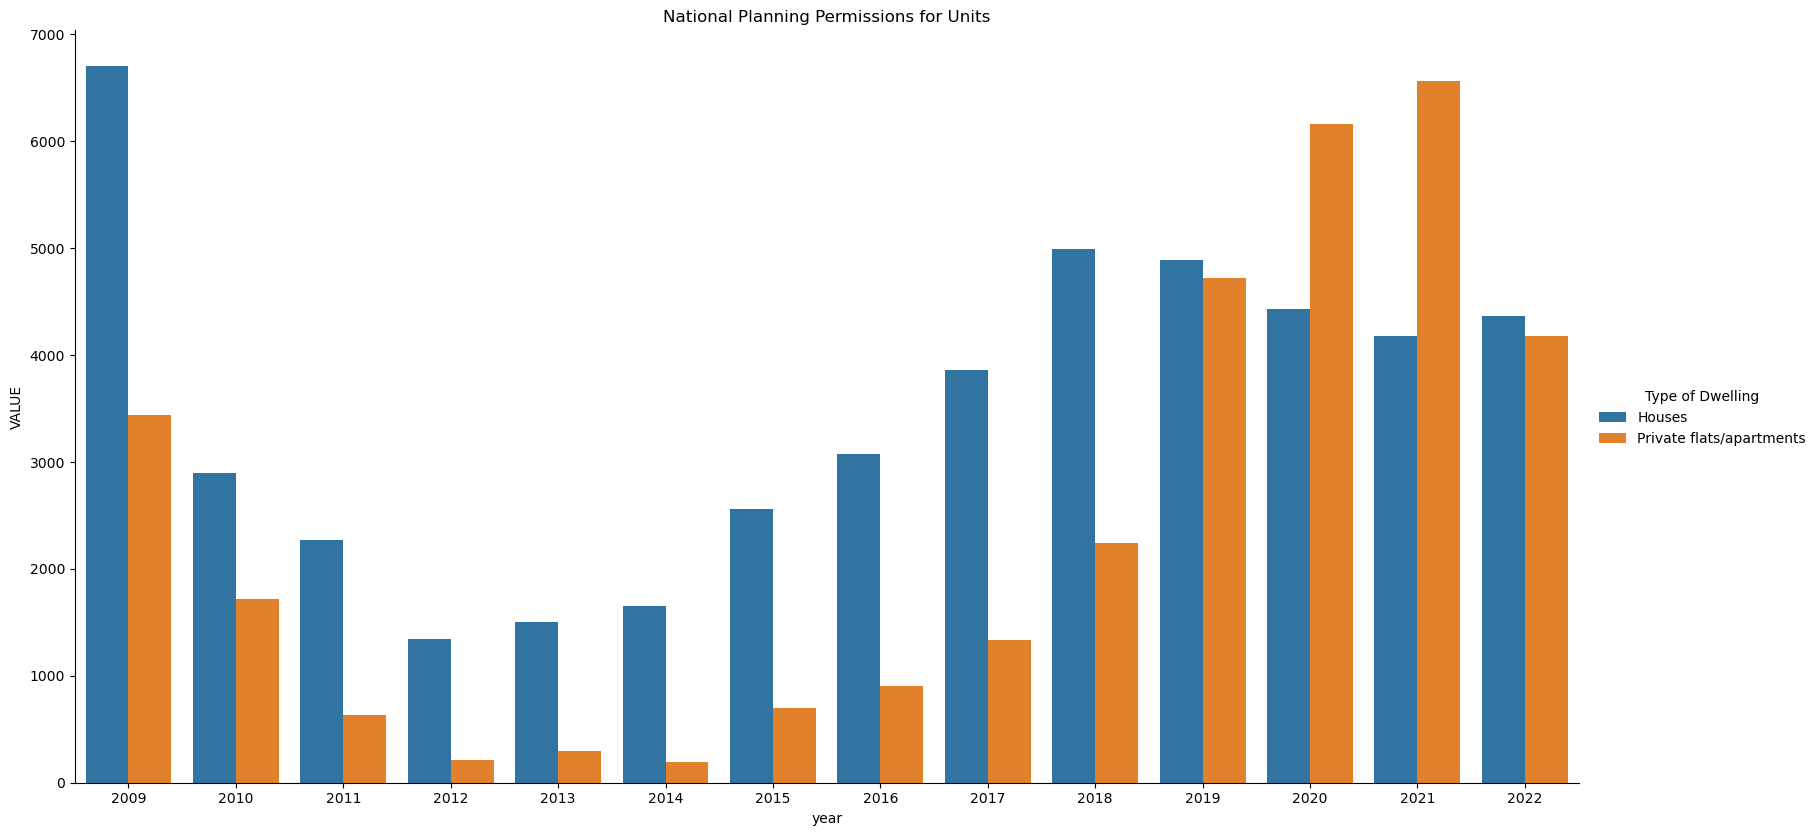

In [101]:
# sns.set(rc={'figure.figsize':(1,1)})
sns.catplot(data=data2, kind="bar", x='year', y='VALUE', hue='Type of Dwelling', height=8.27, aspect=11.7/6)\
    .set(title="National Planning Permissions for Units")
# plt.legend(loc='upper right')
plt.show()

### Construction Sector by Type of Building and Construction

In [25]:
# Source: https://data.gov.ie/dataset/beq04-onstruction-sector-base-2015100-by-type-of-building-and-construction-year-and-statistic-fb86?package_type=dataset
# License: Creative Commons Attribution 4.0
#Accessed: 27 April 2023
total_production_indices_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/BEQ04/CSV/1.0/en")

In [26]:
total_production_indices_df.head()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02402V02895,Type of Building and Construction,UNIT,VALUE
0,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,-,All building and construction,Base 2015=100,143.514977
1,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,11,Building (excluding civil engineering),Base 2015=100,182.795802
2,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,111,Residential building,Base 2015=100,279.281551
3,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,112,Non-residential building,Base 2015=100,115.359508
4,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,12,Civil engineering,Base 2015=100,60.438887


In [27]:
total_production_indices_df.shape

(1840, 8)

In [28]:
total_production_indices_df['STATISTIC'].unique()

array(['BEQ04C01', 'BEQ04C02', 'BEQ04C03', 'BEQ04C04'], dtype=object)

In [29]:
total_production_indices_df['Statistic Label'].unique()

array(['Value of Production Index in Building and Construction',
       'Volume of Production Index in Building and Construction',
       'Value of Production Index in Building and Construction (Seasonally Adjusted)',
       'Volume of Production Index in Building and Construction (Seasonally Adjusted)'],
      dtype=object)

In [30]:
# Prepend 'All Types Together' to the unique values list for Panel visualization
types_of_dev = list(total_production_indices_df['Type of Building and Construction'].unique())
types_of_dev.insert(0, 'All Types Together')
types_of_dev

['All Types Together',
 'All building and construction',
 'Building (excluding civil engineering)',
 'Residential building',
 'Non-residential building',
 'Civil engineering']

In [31]:
# Convert the 'Quarter' into datetime
total_production_indices_df['Quarter'] = total_production_indices_df['Quarter'].apply(convert_quarter_to_dt)

In [32]:
# Plot the Value of Production Index with Plotly Go
def plot_production_index(statistic='Value of Production Index in Building and Construction',
                          type_of_dev='All Types Together'):
    fig = go.Figure()
    # Filter the data by statistic and type
    if type_of_dev == "All Types Together":
        # Plot all types of construction together
        data = total_production_indices_df[(total_production_indices_df['Statistic Label']==statistic)]
        for j in total_production_indices_df['Type of Building and Construction'].unique():
            data2 = data[data['Type of Building and Construction'] == j]
            fig.add_trace(go.Scatter(x=data2['Quarter'], y=data2['VALUE'], mode='lines',
                name=f"{j}",
                connectgaps=True
            ))
    else:
        data = total_production_indices_df[(total_production_indices_df['Statistic Label']==statistic) & (total_production_indices_df['Type of Building and Construction']==type_of_dev)]
        # Plot only the chosen stats and type of construction
        fig.add_trace(go.Scatter(x=data['Quarter'], y=data['VALUE'], mode='lines',
            name=f"{statistic}\n{type_of_dev}",
            connectgaps=True
        ))
    fig.update_layout(
        title_text='Value of Production Index in Building and Construction',
        plot_bgcolor='white'
    )
    return fig

In [33]:
# Define arguments for plotting function
kw = dict(statistic=total_production_indices_df['Statistic Label'].unique(),
    type_of_dev=types_of_dev)
i = pn.interact(plot_production_index, **kw)
text = "<br>\n# Production Index\nSelect the statistic label and type of development"

# Define plot Row and Column
p = pn.Row(i[1][0], pn.Column(text, i[0][0], i[0][1]))
p

Row
    [0] Plotly(Figure, name='interactive00120')
    [1] Column
        [0] Markdown(str)
        [1] Select(name='statistic', options=['Value of Production Inde...], value='Value of Production I...)
        [2] Select(name='type_of_dev', options=['All Types Together', ...], value='All Types Together')

### WPM28 - Wholesale Price Index (Excl VAT) for Building and Construction Materials
Source: https://data.gov.ie/dataset/wpm28-wholesale-price-index-excl-vat-for-building-and-construction-materials?package_type=dataset
License: Creative Commons Attribution 4.0

In [127]:
wholesale_price_index_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/WPM28/CSV/1.0/en")
wholesale_price_index_df.shape

(11880, 8)

In [128]:
wholesale_price_index_df.tail(2)

,STATISTIC,Statistic Label,TLIST(M1),Month,C01409V03262,Type of Material,UNIT,VALUE
11878,WPM28C03,Percentage Change over 12 month in Wholesale P...,202303,2023 March,708,All other metal fittings,%,1.7
11879,WPM28C03,Percentage Change over 12 month in Wholesale P...,202303,2023 March,709,All other products,%,9.3


In [129]:
wholesale_price_index_df['Statistic Label'].unique()

array(['Wholesale Price Index (Excl VAT) for Building and Construction Materials',
       'Percentage Change over 1 month in Wholesale Price Index',
       'Percentage Change over 12 month in Wholesale Price Index'],
      dtype=object)

In [130]:
len(wholesale_price_index_df['Type of Material'].unique())

40

In [140]:
wholesale_price_index_only_df = wholesale_price_index_df[wholesale_price_index_df['Statistic Label'] == 'Wholesale Price Index (Excl VAT) for Building and Construction Materials'].copy()

In [141]:
wholesale_price_index_only_df.dtypes

STATISTIC                   object
Statistic Label             object
TLIST(M1)                    int64
Month                       object
C01409V03262                object
Type of Material            object
UNIT                        object
VALUE                      float64
Quarter             datetime64[ns]
dtype: object

In [171]:
wholesale_price_index_only_df.head(2)

,STATISTIC,Statistic Label,TLIST(M1),Month,C01409V03262,Type of Material,UNIT,VALUE,Quarter
0,WPM28C01,Wholesale Price Index (Excl VAT) for Building ...,201501,2015 January,-,Materials,Base 2015=100,99.2,2015Q1
1,WPM28C01,Wholesale Price Index (Excl VAT) for Building ...,201501,2015 January,601,"Stone, sand and gravel",Base 2015=100,95.7,2015Q1


In [142]:
# Adding quarters from months
wholesale_price_index_only_df['Quarter'] = pd.to_datetime(wholesale_price_index_only_df['TLIST(M1)'].astype('str')+'01', format='%Y%m%d').dt.to_period('Q')

In [149]:
# Averaging index values for each quarter
wholesale_price_index_quaterly_df = wholesale_price_index_only_df.groupby(['Quarter', 'Type of Material']) \
    .mean('VALUE').reset_index()\
    .drop(columns=['TLIST(M1)'], axis=1)
wholesale_price_index_quaterly_df.shape

(1320, 3)

In [150]:
wholesale_price_index_quaterly_df.head(2)

,Quarter,Type of Material,VALUE
0,2015Q1,All other materials,99.233333
1,2015Q1,All other metal fittings,99.200000


In [163]:
# wholesale_price_index_quaterly_df.pivot(index='Quarter', columns='Type of Material', values='VALUE').reset_index()

In [168]:
construction_materials_price_df = wholesale_price_index_only_df.pivot(index=f'TLIST(M1)', columns='Type of Material', values='VALUE').reset_index()

In [169]:
# Adding quarters from months
construction_materials_price_df['Quarter'] = pd.to_datetime(construction_materials_price_df['TLIST(M1)'].astype('str')+'01', format='%Y%m%d').dt.to_period('Q').astype('str')
construction_materials_price_df.drop(columns=['TLIST(M1)'], axis=1, inplace=True)
construction_materials_price_df.head(2)

Type of Material,All other materials,All other metal fittings,All other products,Bituminous emulsions,Bituminous macadam and asphalt,"Bituminous macadam, asphalt and bituminous emulsions",Cement,Concrete blocks and bricks,Copper pipes and fittings,Electrical fittings,...,Rough timber (including plain sawn),Rough timber (softwood),Sand and gravel,Stone,"Stone, sand and gravel",Structural steel,Structural steel and reinforcing metal,Structural steel fabricated metal,Wooden windows and doors,Quarter
0,99.2,99.2,99.3,102.3,99.6,99.7,100.0,100.2,98.7,98.5,...,99.5,99.9,98.0,95.3,95.7,97.6,98.8,97.3,99.9,2015Q1
1,99.1,99.2,99.1,101.6,94.8,95.1,100.0,100.6,98.7,98.7,...,99.9,99.9,96.1,93.5,93.9,97.7,98.9,97.3,99.9,2015Q1


In [165]:
# Duplicate
total_production_indices_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/BEQ04/CSV/1.0/en")
total_production_indices_df.head(2)

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02402V02895,Type of Building and Construction,UNIT,VALUE
0,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,-,All building and construction,Base 2015=100,143.514977
1,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,11,Building (excluding civil engineering),Base 2015=100,182.795802


In [181]:
value_prod_index_df = total_production_indices_df[total_production_indices_df['Statistic Label'] == 'Value of Production Index in Building and Construction (Seasonally Adjusted)']
value_prod_index_df = value_prod_index_df.pivot(index='Quarter', columns='Type of Building and Construction', values='VALUE').reset_index()
value_prod_index_df.head(2)

Type of Building and Construction,Quarter,All building and construction,Building (excluding civil engineering),Civil engineering,Non-residential building,Residential building
0,2000Q1,148.962898,192.043996,58.781197,119.454102,297.635955
1,2000Q2,154.184897,197.648074,62.255066,121.366028,307.404645


In [190]:
# Join the materials cost DF with Value of production
value_prod_index_with_materials_cost_df = construction_materials_price_df.merge(value_prod_index_df) #.drop(columns=['Quarter'], axis=1)
value_prod_index_with_materials_cost_df.shape

(96, 46)

In [183]:
value_prod_index_with_materials_cost_df.head(2)

,All other materials,All other metal fittings,All other products,Bituminous emulsions,Bituminous macadam and asphalt,"Bituminous macadam, asphalt and bituminous emulsions",Cement,Concrete blocks and bricks,Copper pipes and fittings,Electrical fittings,...,"Stone, sand and gravel",Structural steel,Structural steel and reinforcing metal,Structural steel fabricated metal,Wooden windows and doors,All building and construction,Building (excluding civil engineering),Civil engineering,Non-residential building,Residential building
0,99.2,99.2,99.3,102.3,99.6,99.7,100.0,100.2,98.7,98.5,...,95.7,97.6,98.8,97.3,99.9,101.980797,99.945387,105.078265,100.601112,98.086811
1,99.1,99.2,99.1,101.6,94.8,95.1,100.0,100.6,98.7,98.7,...,93.9,97.7,98.9,97.3,99.9,101.980797,99.945387,105.078265,100.601112,98.086811


In [184]:
volume_prod_index_df = total_production_indices_df[total_production_indices_df['Statistic Label'] == 'Volume of Production Index in Building and Construction (Seasonally Adjusted)']
volume_prod_index_df = volume_prod_index_df.pivot(index='Quarter', columns='Type of Building and Construction', values='VALUE').reset_index()
volume_prod_index_df.shape

(92, 6)

In [185]:
volume_prod_index_df.head(2)

Type of Building and Construction,Quarter,All building and construction,Building (excluding civil engineering),Civil engineering,Non-residential building,Residential building
0,2000Q1,216.612217,281.721068,82.701834,147.593343,475.919803
1,2000Q2,218.514305,283.861876,84.575834,148.472402,475.663377


In [191]:
# Join the materials cost DF with volume of production
volume_prod_index_with_materials_cost_df = construction_materials_price_df.merge(volume_prod_index_df)  #.drop(columns=['Quarter'], axis=1)
volume_prod_index_with_materials_cost_df.shape

(96, 46)

In [187]:
volume_prod_index_with_materials_cost_df.head(2)

,All other materials,All other metal fittings,All other products,Bituminous emulsions,Bituminous macadam and asphalt,"Bituminous macadam, asphalt and bituminous emulsions",Cement,Concrete blocks and bricks,Copper pipes and fittings,Electrical fittings,...,"Stone, sand and gravel",Structural steel,Structural steel and reinforcing metal,Structural steel fabricated metal,Wooden windows and doors,All building and construction,Building (excluding civil engineering),Civil engineering,Non-residential building,Residential building
0,99.2,99.2,99.3,102.3,99.6,99.7,100.0,100.2,98.7,98.5,...,95.7,97.6,98.8,97.3,99.9,101.791253,100.024207,103.842099,100.860558,98.169346
1,99.1,99.2,99.1,101.6,94.8,95.1,100.0,100.6,98.7,98.7,...,93.9,97.7,98.9,97.3,99.9,101.791253,100.024207,103.842099,100.860558,98.169346


In [192]:
# Write the DFs to CSV files
value_prod_index_with_materials_cost_df.to_csv('output-datasets/value_prod_index_with_materials_cost.csv', sep='\t', encoding='utf-8', index=False)
volume_prod_index_with_materials_cost_df.to_csv('output-datasets/volume_prod_index_with_materials_cost.csv', sep='\t', encoding='utf-8', index=False)

### New Dwelling Completion

In [113]:
# Source: https://data.gov.ie/dataset/nda01-new-dwelling-completions?package_type=dataset
# License: Creative Commons Attribution 4.0

# dwelling_completion_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/NDA01/CSV/1.0/en")
dwelling_completion_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/NDQ01/CSV/1.0/en")
dwelling_completion_df.tail()

,STATISTIC,STATISTIC Label,TLIST(Q1),Quarter,C02342V02816,Type of House,UNIT,VALUE
387,NDQ01C02,Seasonally Adjusted New Dwelling Completions,20224,2022Q4,-,All house types,Number,7442
388,NDQ01C02,Seasonally Adjusted New Dwelling Completions,20231,2023Q1,06,Single house,Number,1395
389,NDQ01C02,Seasonally Adjusted New Dwelling Completions,20231,2023Q1,07,Scheme house,Number,3701
390,NDQ01C02,Seasonally Adjusted New Dwelling Completions,20231,2023Q1,08,Apartment,Number,2713
391,NDQ01C02,Seasonally Adjusted New Dwelling Completions,20231,2023Q1,-,All house types,Number,7809


In [114]:
dwelling_completion_df.shape

(392, 8)

In [115]:
dwelling_completion_df['STATISTIC Label'].unique()

array(['New Dwelling Completions',
       'Seasonally Adjusted New Dwelling Completions'], dtype=object)

In [119]:
dwelling_completion_df['Type of House'].unique()

array(['Single house', 'Scheme house', 'Apartment', 'All house types'],
      dtype=object)

In [116]:
dwelling_completion_df.dtypes

STATISTIC          object
STATISTIC Label    object
TLIST(Q1)           int64
Quarter            object
C02342V02816       object
Type of House      object
UNIT               object
VALUE               int64
dtype: object

In [117]:
# Convert quarter to datetime
dwelling_completion_df['Quarter'] = dwelling_completion_df['Quarter'].apply(convert_quarter_to_dt)
dwelling_completion_df['Type of House'] = dwelling_completion_df['Type of House'].astype('str')
dwelling_completion_df['STATISTIC Label'] = dwelling_completion_df['STATISTIC Label'].astype('str')

In [126]:
types_of_house = dwelling_completion_df['Type of House'].unique()
select_type_of_house = widgets.Dropdown(options=types_of_house, value=types_of_house[0], description="Type of House")
# Define a function to update the plot based on the selected value
def update_plot(selected_type):
    fig=plt.figure(figsize=(15,6))
    plt.clf()
    for stats in dwelling_completion_df['STATISTIC Label'].unique():
        filtered_data = dwelling_completion_df[(dwelling_completion_df['Type of House'] == selected_type) & \
                                               (dwelling_completion_df['STATISTIC Label'] == stats)]
        plt.plot(filtered_data['Quarter'], filtered_data['VALUE'], label=stats)
    plt.title(f"New Dwellings Completion - {selected_type}")
    plt.xlabel("Quarter")
    plt.legend()
    plt.show()
    
widgets.interactive(update_plot, selected_type=select_type_of_house)

interactive(children=(Dropdown(description='Type of House', options=('Single house', 'Scheme house', 'Apartmen…

### ESB Connections

In [38]:
# Source: https://data.gov.ie/dataset/ndq04-esb-connections?package_type=dataset
# License: Creative Commons Attribution 4.0

esb_connections_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/NDQ04/CSV/1.0/en")
esb_connections_df.head()

,STATISTIC,STATISTIC Label,TLIST(Q1),Quarter,C03451V04162,Type of Connection,UNIT,VALUE
0,NDQ04,ESB Connections,20111,2011Q1,01,New dwelling completion,Number,1875
1,NDQ04,ESB Connections,20111,2011Q1,02,Unfinished,Number,383
2,NDQ04,ESB Connections,20111,2011Q1,03,Reconnection,Number,241
3,NDQ04,ESB Connections,20111,2011Q1,04,Non-Dwelling,Number,205
4,NDQ04,ESB Connections,20111,2011Q1,-,All connections,Number,2704


In [39]:
esb_connections_df['Type of Connection'].unique()

array(['New dwelling completion', 'Unfinished', 'Reconnection',
       'Non-Dwelling', 'All connections'], dtype=object)

In [40]:
# Convert quarter into datetime dtype
esb_connections_df['Quarter'] = esb_connections_df['Quarter'].apply(convert_quarter_to_dt)

In [41]:
# Define list of unique values for the columns
connection_types = esb_connections_df['Type of Connection'].unique()
select_conn_type = widgets.Dropdown(options=connection_types, value=connection_types[0], description="Type of Connection")

# Define a function to update the plot based on the selected value
def update_plot(selected_conn_type):
    fig=plt.figure(figsize=(15,6))
    filtered_data = esb_connections_df[(esb_connections_df['Type of Connection'] == selected_conn_type)]
    plt.clf()
    plt.plot(filtered_data['Quarter'], filtered_data['VALUE'], label='ESB Connections')
    plt.title(f"ESB Connections - {selected_conn_type}")
    plt.xlabel("Period")
    plt.legend()
    plt.show()
    
# Display the widgets
widgets.interactive(update_plot, selected_conn_type=select_conn_type)

interactive(children=(Dropdown(description='Type of Connection', options=('New dwelling completion', 'Unfinish…

### Employment and Investment Incentive

In [42]:
# Source: https://data.gov.ie/dataset/employment-and-investment-incentive-eii-statistics?package_type=dataset
# License: Creative Commons Attribution 4.0

employment_investment_df = pd.read_csv("https://www.revenue.ie/en/corporate/documents/statistics/tax-expenditures/eii-distribution-investment-amounts.csv",
                                       storage_options={'User-Agent': 'Mozilla/5.0'}) # To address HTTP Error 403: ModSecurity Action
employment_investment_df.head()

,range_amount_from_euro,range_amount_to_euro,distruibution_investment_2018,fund_distruibution_per_invester_2018,distruibution_investment_2017,fund_distruibution_per_invester_2017,distruibution_investment_2016,fund_distruibution_per_invester_2016,distruibution_investment_2015,fund_distruibution_per_invester_2015,distruibution_investment_2014,fund_distruibution_per_invester_2014,distruibution_investment_2013,fund_distruibution_per_invester_2013,distruibution_per_invester_2011_2012,fund_distruibution_per_invester_2011_2012
0,1,10000.0,202.0,148.0,392.0,157.0,434,161.0,430,66.0,406,100.0,466.0,79.0,417.0,98.0
1,10001,20000.0,217.0,154.0,342.0,119.0,397,112.0,358,43.0,313,43.0,317.0,61.0,257.0,61.0
2,20001,30000.0,227.0,96.0,380.0,90.0,432,71.0,337,24.0,304,43.0,280.0,45.0,247.0,35.0
3,30001,40000.0,83.0,38.0,140.0,37.0,158,39.0,103,14.0,92,37.0,108.0,17.0,90.0,11.0
4,40001,50000.0,146.0,180.0,235.0,185.0,316,209.0,271,40.0,217,NaN,171.0,34.0,156.0,38.0


In [43]:
employment_investment_df.shape

(12, 16)

### Commencement Notices
Source: https://data.cso.ie/table/HSM13

In [85]:
commencement_notices_df = pd.read_csv("datasets/HSM13.20230514T190540.csv")
commencement_notices_df.shape

(10137, 10)

In [86]:
commencement_notices_df.tail()

,STATISTIC,Statistic Label,TLIST(M1),Month,C01947V02657,Local Authority,C02424V02930,Residential Units Commenced,UNIT,VALUE
10132,HSM13,Commencement Notices,202303,2023 March,91,Waterford City and County,4,Number of residential units,Number,114
10133,HSM13,Commencement Notices,202303,2023 March,91,Waterford City and County,5,Number of one-off residential units,Number,9
10134,HSM13,Commencement Notices,202303,2023 March,92,Tipperary County,3,Number of notices for residential development,Number,23
10135,HSM13,Commencement Notices,202303,2023 March,92,Tipperary County,4,Number of residential units,Number,58
10136,HSM13,Commencement Notices,202303,2023 March,92,Tipperary County,5,Number of one-off residential units,Number,21


In [94]:
commencement_notices_df['Local Authority'] = commencement_notices_df['Local Authority'].apply(lambda x: str(x).split(' ')[0])

In [95]:
commencement_notices_df['Residential Units Commenced'].unique()

array(['Number of notices for residential development',
       'Number of residential units',
       'Number of one-off residential units'], dtype=object)

In [96]:
commencement_notices_df.dtypes

STATISTIC                              object
Statistic Label                        object
TLIST(M1)                               int64
Month                          datetime64[ns]
C01947V02657                            int64
Local Authority                        object
C02424V02930                            int64
Residential Units Commenced            object
UNIT                                   object
VALUE                                   int64
dtype: object

In [97]:
commencement_notices_df['Month'] = pd.to_datetime(commencement_notices_df['TLIST(M1)'].astype('str')+'01', format='%Y%m%d')

In [99]:
def plot_commencement_notices(residentials_units='Number of notices for residential development', county='State'):
    fig = go.Figure()
    data = commencement_notices_df[(commencement_notices_df['Residential Units Commenced'] == residentials_units) & \
                                    (commencement_notices_df['Local Authority'] == county)]
    fig.add_trace(go.Scatter(x=data['Month'], y=data['VALUE'], mode='lines',
        connectgaps=True
    ))
    fig.update_layout(
        title_text=f'{residentials_units} - {county}',
        plot_bgcolor='white'
    )
    return fig

# Define arguments for plotting function
kw = dict(residentials_units=commencement_notices_df['Residential Units Commenced'].unique(),
    county=commencement_notices_df['Local Authority'].unique())
i = pn.interact(plot_commencement_notices, **kw)
text = "<br>\n# Commencement Notices\nSelect the Notice type and County"

# Define plot Row and Column
p = pn.Row(i[1][0], pn.Column(text, i[0][0], i[0][1]))
p

Row
    [0] Plotly(Figure, name='interactive00215')
    [1] Column
        [0] Markdown(str)
        [1] Select(name='residentials_units', options=['Number of notices for re...], value='Number of notices f...)
        [2] Select(name='county', options=['Carlow', 'Cavan', ...], value='Carlow')

### New House Registrations
Source: https://data.cso.ie/table/HSM10

In [47]:
new_house_registration_df = pd.read_csv("datasets/HSM10.20230514T190514.csv")
new_house_registration_df.shape

(199, 8)

In [48]:
new_house_registration_df.tail()

,STATISTIC,STATISTIC Label,TLIST(M1),Month,C02196V02652,State,UNIT,VALUE
194,HSM10,New House Guarantee Registrations,202203,2022 March,-,State,Number,1805.0
195,HSM10,New House Guarantee Registrations,202204,2022 April,-,State,Number,1313.0
196,HSM10,New House Guarantee Registrations,202205,2022 May,-,State,Number,2737.0
197,HSM10,New House Guarantee Registrations,202206,2022 June,-,State,Number,2487.0
198,HSM10,New House Guarantee Registrations,202207,2022 July,-,State,Number,NaN


### National Housing Development Survey 2012
Source: https://data.gov.ie/dataset/national-housing-development-survey-2012?package_type=dataset <br>
License: Creative Commons Attribution 4.0

In [49]:
national_housing_dev_survey_12_df = pd.read_csv("https://opendata.housing.gov.ie/dataset/7a654bb1-4b53-4efe-b70e-98a10bdd13ff/resource/b36bfb0d-2caf-4b98-81d5-ad4b7992f573/download/national_housing_development_survey_2012.csv",
                                             encoding="cp437")  # Default utf-8 resulted in encoding error

national_housing_dev_survey_17_df = pd.read_csv("https://opendata.housing.gov.ie/dataset/f168f451-de57-4883-ab19-c4f02a98a778/resource/5ce21109-112a-4f27-90f5-5c3ef43f7c7b/download/unfinished_housing_survey_2017.csv",
                                             encoding="cp437")  # Default utf-8 resulted in encoding error
national_housing_dev_survey_17_df.head()

,Department Ref Number,Construction Activity (Y/N),County,Development Name,Address 1,Address 2,Planning Ref,Planning Date,Planning Expiry Date,Detached Units,...,Water Waste,No OS Areas In Planning Permission,OS Area Complete,OS Area Levelled,OS Area Untouched,Survey Date,Building Site Only,Unnamed: 55,Occupied Houses Impacted,Occupied Apartments Impacted
0,71.0,No,Carlow,Ard Bhaile,Tullow Road,Rathvilly,04/686,24/04/2005,23/04/2010,58.0,...,12.0,0.0,0.0,0.0,0.0,16/08/2017,No,NaN,10.0,0.0
1,74.0,No,Carlow,Ballyknockan Manor,Kilkenny Road,Leighlinbridge,03/430,14/12/2004,13/12/2009,10.0,...,32.0,4.0,1.0,0.0,3.0,18/08/2017,No,NaN,0.0,0.0
2,79.0,No,Carlow,Castlerock,Carrigduff,Bunclody,03/479,01/10/2003,31/10/2008,11.0,...,60.0,8.0,5.0,0.0,3.0,16/08/2017,No,NaN,30.0,6.0
3,82.0,No,Carlow,Fairgreen Crescent,Tinahely Road,Hackettstown,06/157,06/12/2006,05/12/2011,0.0,...,6.0,2.0,2.0,0.0,0.0,16/08/2017,No,NaN,4.0,0.0
4,83.0,No,Carlow,Friars Lough,Leighlinbridge,Leighlinbridge,04/506,25/10/2005,26/10/2010,31.0,...,18.0,2.0,2.0,0.0,0.0,18/08/2017,No,NaN,6.0,0.0


In [50]:
national_housing_dev_survey_17_df.shape

(423, 58)

In [51]:
national_housing_dev_survey_12_df.head(2)

,DRef,"0=Remain in dbase, 1= Complete",Development,Address,Address 2,County,GIS X,GIS Y,Plan Ref,Plan Date,...,Lighting No Complete,Water Potable,Water Storm,Water Waste,Area No OS,Area Complete,Area Levelled,Area Untouched,Construction,Survey Date
0,1,1,2 Houses,Coolgreany Road,Arklow,Wicklow,"723,020","673,022",125/00,31/10/2000,...,0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,No,10/07/2012
1,2,1,Bridgewater Quay,NaN,Arklow,Wicklow,"724,816","673,547",04/120,28/04/2005,...,0,23.0,23.0,23.0,1.0,1.0,0.0,0.0,No,04/07/2012


### EHQ03 - Average Earnings, Hours Worked, Employment and Labour Costs
Source: https://data.cso.ie/table/EHQ03

In [52]:
average_earnings_df = pd.read_csv("datasets/EHQ03.20230514T190517.csv")
average_earnings_df.shape

(4080, 6)

In [53]:
average_earnings_df.tail()

,Statistic Label,Quarter,Economic Sector NACE Rev 2,Type of Employee,UNIT,VALUE
4075,Average Hourly Benefit in Kind (Seasonally Adj...,2022Q3,Construction (F),"Production, transport, craft and other manual ...",Euro,NaN
4076,Average Hourly Benefit in Kind (Seasonally Adj...,2022Q4,Construction (F),All employees,Euro,NaN
4077,Average Hourly Benefit in Kind (Seasonally Adj...,2022Q4,Construction (F),"Managers, professionals and associated profess...",Euro,NaN
4078,Average Hourly Benefit in Kind (Seasonally Adj...,2022Q4,Construction (F),"Clerical, sales and service employees",Euro,NaN
4079,Average Hourly Benefit in Kind (Seasonally Adj...,2022Q4,Construction (F),"Production, transport, craft and other manual ...",Euro,NaN


In [54]:
average_earnings_df['Statistic Label'].unique()

array(['Employment', 'Average Weekly Earnings', 'Average Hourly Earnings',
       'Average Hourly Earnings excluding Irregular Earnings',
       'Average Weekly Paid Hours', 'Average Hourly Irregular Earnings',
       'Average Hourly Other Labour Costs',
       'Average Hourly Total Labour Costs',
       'Average Hourly Benefit in Kind',
       'Average Weekly Earnings (Seasonally Adjusted)',
       'Average Hourly Earnings (Seasonally Adjusted)',
       'Average Hourly Earnings excluding Irregular Earnings (Seasonally Adjusted)',
       'Average Weekly Paid Hours (Seasonally Adjusted)',
       'Average Hourly Irregular Earnings (Seasonally Adjusted)',
       'Average Hourly Other Labour Costs (Seasonally Adjusted)',
       'Average Hourly Total Labour Costs (Seasonally Adjusted)',
       'Average Hourly Benefit in Kind (Seasonally Adjusted)'],
      dtype=object)

### Eurostat Production in Construction

In [55]:
# Source: https://ec.europa.eu/eurostat/web/products-datasets/-/teiis500
# eu_prod_construction_df = pd.read_csv("https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/teiis500.tsv.gz", delimiter="\t")
# https://wikis.ec.europa.eu/display/EUROSTATHELP/API+SDMX+2.1+-+data+query
url = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/teiis500?format=TSV"
res = requests.get(url)
res

<Response [200]>

In [56]:
eu_prod_construction = res.text

In [57]:
eu_prod_construction_df = pd.read_csv(StringIO(eu_prod_construction), delimiter='\t')
eu_prod_construction_df.head()

,"freq,indic_bt,nace_r2,unit,geo\TIME_PERIOD",2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03
0,"M,PROD,F,I2015_SCA,AT",134.1,133.5,130.4,128.7,130.1,129.1,130.0,132.3,128.8,133.3,146.2,130.3 p
1,"M,PROD,F,I2015_SCA,BE",98.8,99.4,98.7,100.5,99.1,98.1,98.3,99.9,99.3,97.9,100.6,98.4
2,"M,PROD,F,I2015_SCA,BG",89.9,91.8,90.4,89.9,90.2,90.0,90.6,90.9,89.4,89.8,89.5,90.2 p
3,"M,PROD,F,I2015_SCA,CZ",112.5,109.8,109.4,105.9,107.5,105.7,108.6,108.6,108.4,113.9,109.7,:
4,"M,PROD,F,I2015_SCA,DE",112.7,113.8,113.1,112.2,110.9,110.9,113.3,111.1,103.2,116.9,117.2,111.8


In [58]:
eu_prod_construction_df.shape

(75, 13)

In [59]:
for country in eu_prod_construction_df['freq,indic_bt,nace_r2,unit,geo\TIME_PERIOD'].unique():
    if "DE" in country:
        print(country)

M,PROD,F,I2015_SCA,DE
M,PROD,F,PCH_M12_CA,DE
M,PROD,F,PCH_M1_SCA,DE


There are three units of measurement:
- Index,2015=100 (SCA)
- Percentage change m/m-1 (SCA)
- Percentage change m/m (CA)

In [60]:
# Taking out country, and unit of measurement to separate columns
eu_prod_construction_df['country'] = eu_prod_construction_df['freq,indic_bt,nace_r2,unit,geo\TIME_PERIOD'].apply(lambda x: x.split(',')[4])
eu_prod_construction_df['stats'] = eu_prod_construction_df['freq,indic_bt,nace_r2,unit,geo\TIME_PERIOD'].apply(lambda x: x.split(',')[3])

In [61]:
eu_prod_construction_df.head()

,"freq,indic_bt,nace_r2,unit,geo\TIME_PERIOD",2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,country,stats
0,"M,PROD,F,I2015_SCA,AT",134.1,133.5,130.4,128.7,130.1,129.1,130.0,132.3,128.8,133.3,146.2,130.3 p,AT,I2015_SCA
1,"M,PROD,F,I2015_SCA,BE",98.8,99.4,98.7,100.5,99.1,98.1,98.3,99.9,99.3,97.9,100.6,98.4,BE,I2015_SCA
2,"M,PROD,F,I2015_SCA,BG",89.9,91.8,90.4,89.9,90.2,90.0,90.6,90.9,89.4,89.8,89.5,90.2 p,BG,I2015_SCA
3,"M,PROD,F,I2015_SCA,CZ",112.5,109.8,109.4,105.9,107.5,105.7,108.6,108.6,108.4,113.9,109.7,:,CZ,I2015_SCA
4,"M,PROD,F,I2015_SCA,DE",112.7,113.8,113.1,112.2,110.9,110.9,113.3,111.1,103.2,116.9,117.2,111.8,DE,I2015_SCA


In [62]:
eu_prod_construction_df.drop(columns=['freq,indic_bt,nace_r2,unit,geo\TIME_PERIOD'], axis=1, inplace=True)
eu_prod_construction_df = eu_prod_construction_df.melt(id_vars=['stats', 'country'], var_name='month', value_name="value")

In [63]:
eu_prod_construction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stats    900 non-null    object
 1   country  900 non-null    object
 2   month    900 non-null    object
 3   value    900 non-null    object
dtypes: object(4)
memory usage: 28.2+ KB


In [64]:
eu_prod_construction_df.shape

(900, 4)

In [65]:
# Some values aren't in float format eg. '124 p', and also contain random values like ":"
# Cleaning up and casting them to float dtype
eu_prod_construction_df['float_value'] = eu_prod_construction_df['value'].apply(cast_to_float).dropna()

In [66]:
# Convert to correct datatypes
eu_prod_construction_df['stats'] = eu_prod_construction_df['stats'].astype('str')
eu_prod_construction_df['country'] = eu_prod_construction_df['country'].astype('str')
eu_prod_construction_df['month'] = pd.to_datetime(eu_prod_construction_df['month']+'-01', format='%Y-%m -%d')


In [67]:
eu_prod_construction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   stats        900 non-null    object        
 1   country      900 non-null    object        
 2   month        900 non-null    datetime64[ns]
 3   value        900 non-null    object        
 4   float_value  864 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 35.3+ KB


In [68]:
eu_prod_construction_df.head()

,stats,country,month,value,float_value
0,I2015_SCA,AT,2022-04-01,134.1,134.1
1,I2015_SCA,BE,2022-04-01,98.8,98.8
2,I2015_SCA,BG,2022-04-01,89.9,89.9
3,I2015_SCA,CZ,2022-04-01,112.5,112.5
4,I2015_SCA,DE,2022-04-01,112.7,112.7


In [69]:
eu_prod_construction_df['stats'].unique()

array(['I2015_SCA', 'PCH_M12_CA', 'PCH_M1_SCA'], dtype=object)

In [70]:
# Define dict to map stats from data to actual definition
stats_labels = {
    'I2015_SCA': 'Index, 2015=100 (SCA)',
    'PCH_M12_CA': 'Percentage Change m/m-12 (CA)',
    'PCH_M1_SCA': 'Percentage Change m/m-1 (CSA)'
}

# Plotly plot
def plot_euro_prod_construction(country='DE'):
    fig = go.Figure()
    for i in eu_prod_construction_df['stats'].unique():
        # Filter the data by chosen parameter values
        data = eu_prod_construction_df.loc[(eu_prod_construction_df["country"] == country) & (eu_prod_construction_df['stats'] == i)]
        fig.add_trace(go.Scatter(x=data['month'], y=data['float_value'], mode='lines',
            name=f"{stats_labels[i]}",
            connectgaps=True, 
        ))
    fig.update_layout(
        plot_bgcolor='white'
    )
    return fig

In [71]:
# Define arguments for plotting function
kw = dict(country=eu_prod_construction_df['country'].unique())
i = pn.interact(plot_euro_prod_construction, **kw)
text = "<br>\n# Europe Production in Construction\nSelect the Country"

# Define plot Row and Column
p = pn.Row(i[1][0], pn.Column(text, i[0][0]))
p

Row
    [0] Plotly(Figure, name='interactive00136')
    [1] Column
        [0] Markdown(str)
        [1] Select(name='country', options=['AT', 'BE', 'BG', ...], value='DE')